## Santa or not santa?

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

In [10]:
os.getcwd()
pth="/content/drvie/My Drive/Datasets/images"
data=[]
labels=[]
print(pth)
for subdir, dirs, files in os.walk(pth):
    print(subdir)
    label = pth.split(os.path.sep)[-1]
    for file in files:
        image = cv2.imread(os.path.join(subdir, file)) 
        if image is not None:
            image = cv2.resize(image, (28, 28))
            image = img_to_array(image)
            data.append(image)
            label = subdir.split(os.path.sep)[-1]
            labels.append(1 if label == "santa" else 0)
       


/content/drvie/My Drive/Datasets/images


In [5]:
# scale the data
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
data.shape,labels.shape

((0,), (0,))

In [ ]:
(xtrain, xtest, ytrain, ytest) = train_test_split(data,labels, test_size=0.25, random_state=42)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((691, 28, 28, 3), (691,), (231, 28, 28, 3), (231,))

In [ ]:
# convert the labels from integers to vectors
ytrain = to_categorical(ytrain, num_classes=2)
ytest = to_categorical(ytest, num_classes=2)

In [ ]:
ytrain.shape,ytest.shape

((691, 2), (231, 2))

In [ ]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

In [ ]:
		# initialize the model
		model = Sequential()
		inputShape = (28,28,3)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(2))
		model.add(Activation("softmax"))


In [ ]:
# initialize the number of epochs to train for, initia learning rate,
# and batch size
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


In [ ]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        1520      
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0

In [ ]:
H = model.fit(x=aug.flow(xtrain, ytrain, batch_size=BS),validation_data=(xtest, ytest), 
              steps_per_epoch=len(xtrain) // BS,epochs=EPOCHS, verbose=1)

Train for 21 steps, validate on 231 samples
Epoch 1/25
21/21 [==============================] - 3s 124ms/step - loss: 0.7134 - accuracy: 0.4917 - val_loss: 0.6534 - val_accuracy: 0.4632
Epoch 2/25
21/21 [==============================] - 2s 76ms/step - loss: 0.5816 - accuracy: 0.6480 - val_loss: 0.5534 - val_accuracy: 0.6580
Epoch 3/25
21/21 [==============================] - 2s 98ms/step - loss: 0.4405 - accuracy: 0.8407 - val_loss: 0.5042 - val_accuracy: 0.7532
Epoch 4/25
21/21 [==============================] - 2s 105ms/step - loss: 0.4007 - accuracy: 0.8392 - val_loss: 0.3886 - val_accuracy: 0.8658
Epoch 5/25
21/21 [==============================] - 2s 86ms/step - loss: 0.2916 - accuracy: 0.8877 - val_loss: 0.2768 - val_accuracy: 0.9134
Epoch 6/25
21/21 [==============================] - 2s 89ms/step - loss: 0.2272 - accuracy: 0.9165 - val_loss: 0.2512 - val_accuracy: 0.9091
Epoch 7/25
21/21 [==============================] - 2s 80ms/step - loss: 0.2082 - accuracy: 0.9107 - val_los

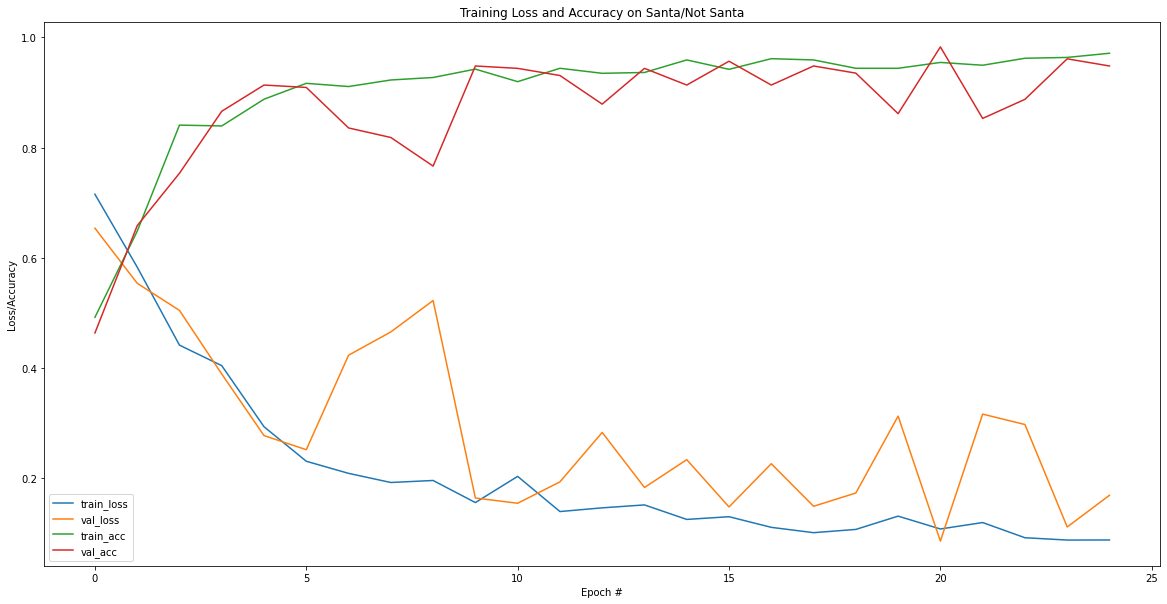

In [ ]:
# plot the training loss and accuracy

plt.subplots(figsize=(20,10))
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Santa/Not Santa")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [ ]:
#Predictions
model.predict(xtest)

prediction = model.predict(xtest)

In [ ]:
k=154
pred_label='notSanta' if prediction[k][0]>prediction[k][1] else 'Santa'

print(pred_label)
cv2.imshow("Output", xtest[k])
cv2.waitKey(0)
